# <font color='#eb3483'> Data Visualization with Seaborn </font>


Just like a picture tells a 1000 words, a graph can summarize 1000s of data points and can tell a story that a spreadsheet or summary statistic can't hold a torch to. In this notebook we'll be working through how to make jaw-dropping graphs in seaborn. This tutorial's been adapted from Bruno Gonçalves (www.data4sci.com) and the official seaborn tutorial (https://seaborn.pydata.org/tutorial.html).


### <font color='#eb3483'> Imports </font>

For today's class we'll be using the package Seaborn (common convention is to imported it as sns - ask Taryn to find out why!). Seaborn is a wrapper (meaning that it groups functionality from another package in an easier format) for matplotlib, a very common graphing library that can be a little clunky to write. For the majority of your needs, seaborn is quicker and prettier - but we'll import matplotlib for some specific functionality.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

For this notebook (and if you want to follow the Seaborn help pages) you'll need the most recent version of seaborn (0.10.1) - let's check our package version. If yours doesn't say 0.10.1, make sure to install the latest version (i.e. by using conda install seaborn in your environment).

In [2]:
sns.__version__


'0.10.0'

We're also going to add this handy line that sets the aesthetics (what all of our graphs look like) to the default seaborn style. Don't worry, we'll play around with aesthetics more at the end of this notebook!

In [12]:
sns.set()

## <font color='#eb3483'> 1. Seaborn Datasets </font>


To start, we're going to need something to actually plot! Seaborn makes a small list of datasets easily available:

In [4]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

This makes it easier to learn how to use the library using standard data

In [6]:
tips = sns.load_dataset("tips")

The first time you load a dataset you'll need an internet connection so that the data can be downloaded from github. The **load_dataset** function returns a pandas data frame

In [7]:
# what is the command to look at the first few lines? 
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
#look at the shape. check out the column names.
tips.shape

(244, 7)

In [10]:
#check out the column names.
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [15]:
#find the unique values in the column size

#Google to find the code to do this ... and try it out.
tips["size"].unique

<bound method Series.unique of 0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64>

## <font color='#eb3483'> 2. Relational Plots </font>

Seaborn makes plotting super easy, and integreates seamlessly with the use of dataframes. Making an attractive scatter plot is as simple as setting the data frame (data parameter), and specifying what you want on your x and y axes!

Relationplots have numerical data on both the x and y axis (think scatterplot)

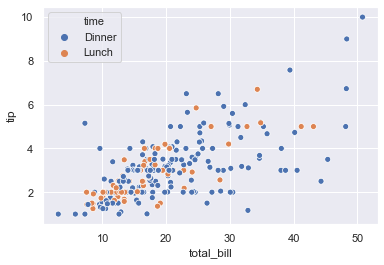

In [19]:
ax = sns.scatterplot(x="total_bill", y="tip", data=tips, hue = "time")

In [20]:
#How do I look up some help on the sns.scatterplot function
sns.scatterplot?

Signature:
sns.scatterplot(
    x=None,
    y=None,
    hue=None,
    style=None,
    size=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    x_bins=None,
    y_bins=None,
    units=None,
    estimator=None,
    ci=95,
    n_boot=1000,
    alpha='auto',
    x_jitter=None,
    y_jitter=None,
    legend='brief',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue`` and

So what is this object? In seaborn we have two different levels of functions **(1) Figure-Level functions**, and **(2) Axes-Level functions**. You can think of figure-level functions as one-stop shops that makes a whole figure object (the type of object will be seaborn facet grid) and deals with all the behind the scene work of organizing multiple plots (if applicable) and coordinating legends. Axes level objects are a little more granular and just create one graph object (called an axes). The benefit of this is you can combine individual axes into a larger graph (giving you a little more control and customization potential). The nuances of these differences aren't important for the majority of graphs you'll make, for a deeper dive look at the bonus section at the end of this notebook.

In [21]:
# Let's check out what type the scatterplot function outputs
type(ax)

matplotlib.axes._subplots.AxesSubplot

As you can see the axis level functions return an Axis object. To see the benefit of an axes level object, let's try creating a more complicated combination of graphs.

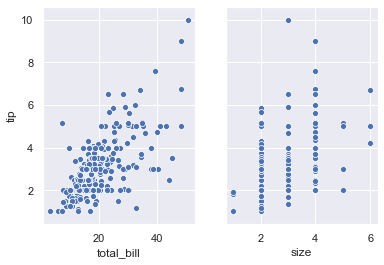

In [22]:
#This is functionality from matplotlb (usually imported as plt) - use our handy ? to check-out it's info 
#We're creating a subplot (think of it like a grid of graphs) - the first two arguments are rows, cols of the grid

f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))

#Now that we have an empty grid of plots we can fill in plots
ax0 = sns.scatterplot(x="total_bill", y="tip", data=tips, ax=axes[0] )
ax1 = sns.scatterplot(x="size", y="tip", data=tips, ax=axes[1] )

#Look we now have our grid of graphs!

Sometimes all this fussing about making our own grid is a bit too much work - so let's look at some figure level functions. A more general function to make graphs from seaborn is called relplot (RELational PLOT). Instead of having one function for each kind of graph, seaborn packaged them altogether and let's you pick what type of graph you see by specifying the kind parameter. We can start by recreating our scatter plot of total ball by tip.

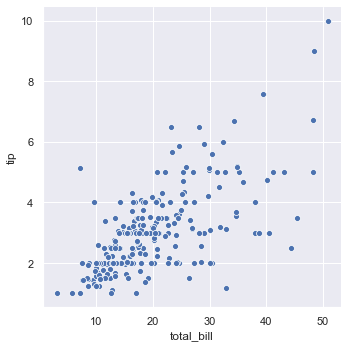

In [23]:
fg = sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")

Let's confirm that we now have a figure level object

In [24]:
type(fg)

seaborn.axisgrid.FacetGrid

The generic figure functions return a FacetGrid object.   

Making more complex figures even simpler! In this plot we're going to change the dots in our scatter plot to have a different size and color based on other data we have (think of it as mapping columns to different visual aspects of our plot).

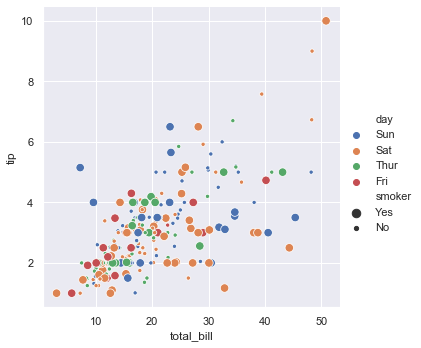

In [25]:
fg = sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="day", size="smoker",
            )

We can even specify the order in which colors are used!

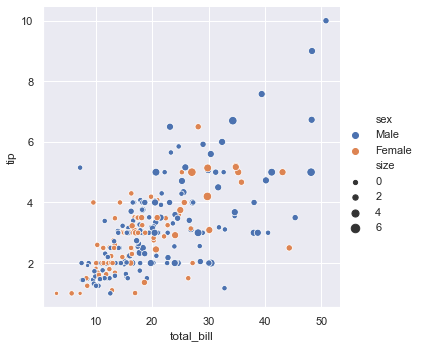

In [26]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size",
            hue_order=["Male", "Female"],  
            )

And differnet marker types - the options are pretty amazing!

In [40]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size", style='smoker',
            hue_order=["Female", "Male"],  
            )

ValueError: Could not interpret input 'total_bill'

The main advantage of the figure level functions is that making more complicated graphs is now a breeze, let's take a look at our data but only at smaller data segments based on the day of the week (rows) and whether or not the customer was a smoker (column).

In [38]:
fg = sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size", 
            col='smoker', row='day', style='time',
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )

#Based on this graph - can you figure out how we set how we segment the data?

ValueError: Could not interpret input 'total_bill'

### <font color='#eb3483'> Practice! </font>
1. Let's practice just how quick and easy it is to knock out a beautiful graph. Load in the diamonds dataframe from seaborn and make a figure that plots carat versus price. Try coloring it by color!

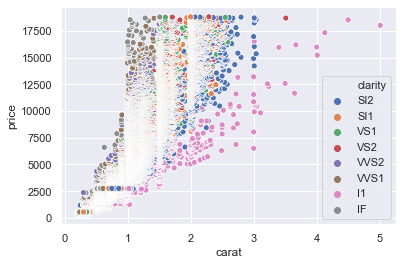

In [44]:
diamonds = sns.load_dataset("diamonds")
ax = sns.scatterplot(x="carat", y="price", data=diamonds, hue = "clarity")

2. Yikes that's a ton of data on one plot, let's make a grid of plots that segments our data by color (rows) and cut (columns). Once done please note - you just made 35 graphs with one line of code - that's pretty fricken cool!

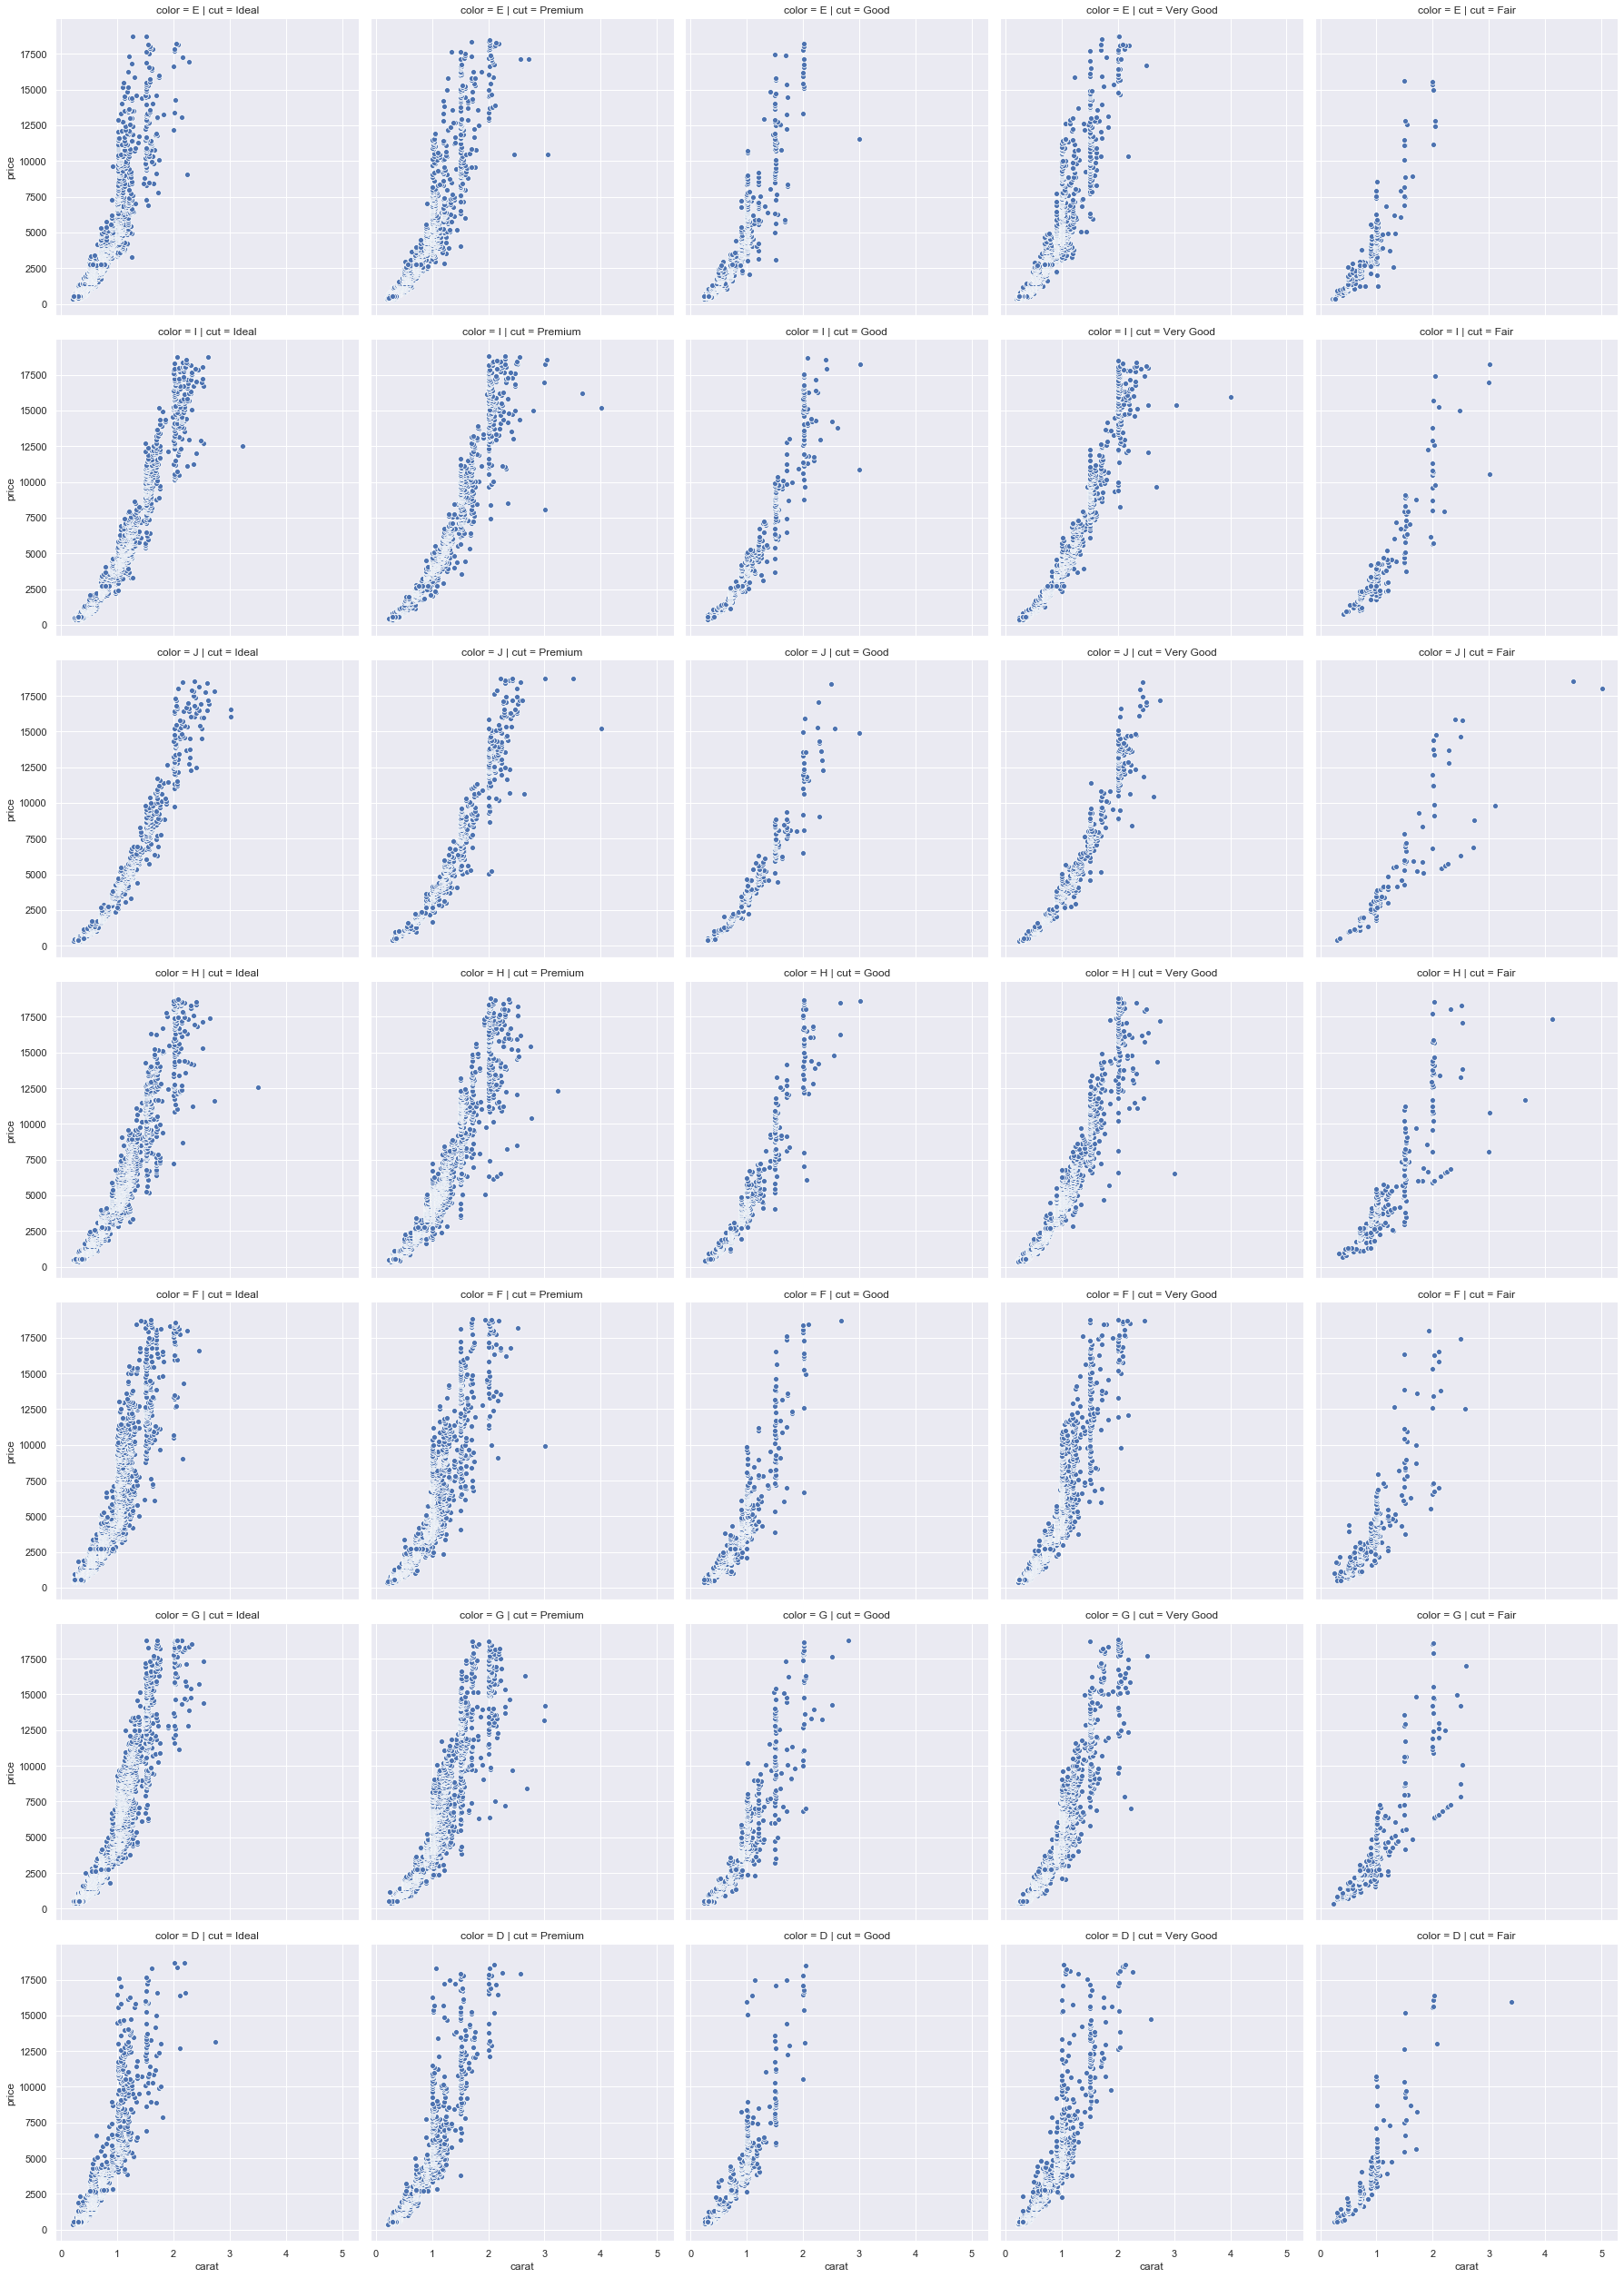

In [53]:
sns.relplot(data=diamonds, kind='scatter', x='carat', y='price', row='color', col='cut')

## <font color='#eb3483'> 3. Categorical Plots </font>
We've looked at plotting numeric data on each axis, but what if we wanted to plot categorical data? For that seaborn offers catplot (CATegorical PLOT). Let's take it for a spin by making a bar plot:

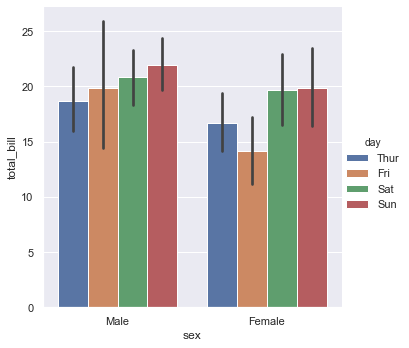

In [56]:
tips = sns.load_dataset("tips")
sns.catplot(x="sex",y="total_bill", hue="day", data=tips, kind="bar")

Sometimes bar plots aren't the best at showing a distribution of data, for that we can use other kinds of categorical plots.

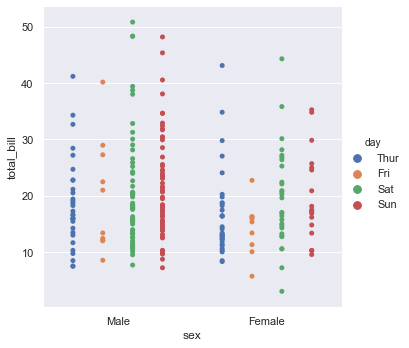

In [57]:
sns.catplot(x="sex", y="total_bill", hue="day", data=tips, kind="strip", 
            jitter=False, dodge=True)

Sometimes all the points being on the same point can hide what the actual distribution of data is - try changing the jitter parameter above to see what happens!

### <font color='#eb3483'> Practice! </font>
1. Let's rejig the graph we just made, instead of coloring by day of the week let's make a facet grid with a sub-plot for each day of the week. Try making it a violin plot instead of a strip plot too!

## <font color='#eb3483'> 4. Advanced Plots </font>
We've explored some pretty cool (and helpful) functionality in seaborn, but sometimes we want to do quick explorations of a lot of data and thinking about each variable might be a little time consuming. Lucky for us, Seaborn has some great built-in features that let's get holistic views of our data quickly!

### <font color='#eb3483'> Pair Plot </font>

The first kind of advanced plot we look at is the pair plot, which shows all the pairwise comparisons in our dataset (optionally conditioned on a categorical variable). Let's take a look at our tips dataset and see what pair plot can generate.

In [58]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

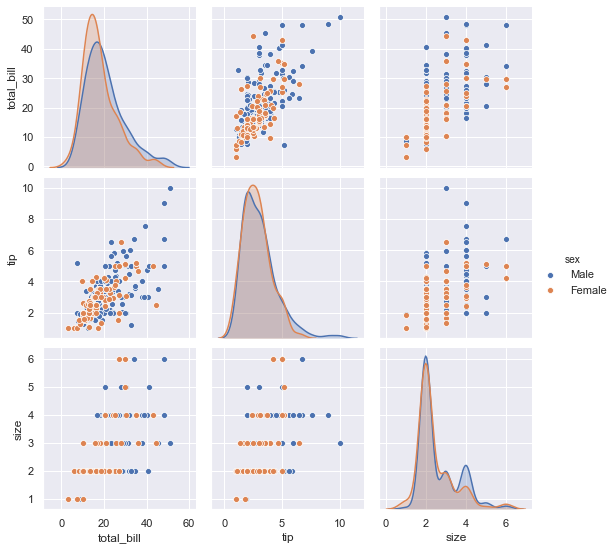

In [60]:
#Let's make a pair plot but condition on gender - try removing the hue condition and see what happens
pp = sns.pairplot(tips, hue="sex")

Once you finish marvelling at how gorgeous this graph is, do you notice anything about what columns pairplot chooses to do comparisons on?

### <font color='#eb3483'> Joint Plot </font>

Another thing we might be interested in looking at is a deep dive on two variables. Seaborn let's us do a joint plot of two numeric variables - showing us a representation of their **joint** distribution (distribution of both variables together - think scatter plot!), and the **marginal** distributions of each variable (which is just the distribution of each variable separately - think histogram!).

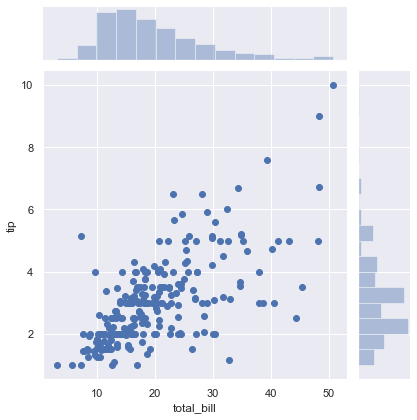

In [61]:
jp = sns.jointplot("total_bill", "tip", data=tips)

Joint plot has some really cool different types of plots. 'KDE' (Kernel Density Estimation) fits a smooth distribution over your data points.

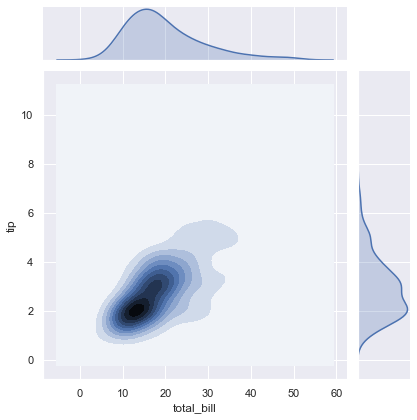

In [62]:
jp = sns.jointplot("total_bill", "tip", data=tips, kind="kde")

### <font color='#eb3483'> Quick practice! </font>
1. Let's explore the iris data-set. Load it in and create a joint plot of sepal length and sepal width.

2. Make a pair plot of the whole data-set, color it by species.

## <font color='#eb3483'> 5. Style </font>
Don't get me wrong, the built-in seaborn aesthetics look amazing (take a peak at matplotlib if you want to see how much of a step up you're starting with in seaborn). But sometimes you want to customize your graph even further! Seaborn's still got you covered. The first thing we can do is set different seaborn themes in our sns.set() function (take a peek at the help docs to see what you can change)!

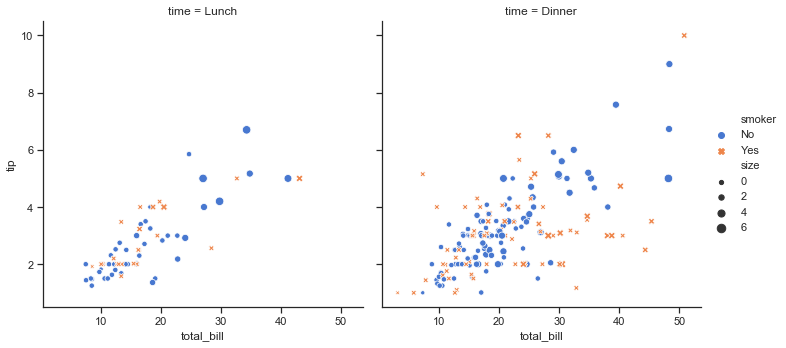

In [63]:
#Let's change the style and palette and see what happens
sns.set(style="ticks", palette="muted")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

If you only want to change things for a specific graph, most seaborn functions accept additional parameters that let you change the style of that graph. Let's check out an example: 

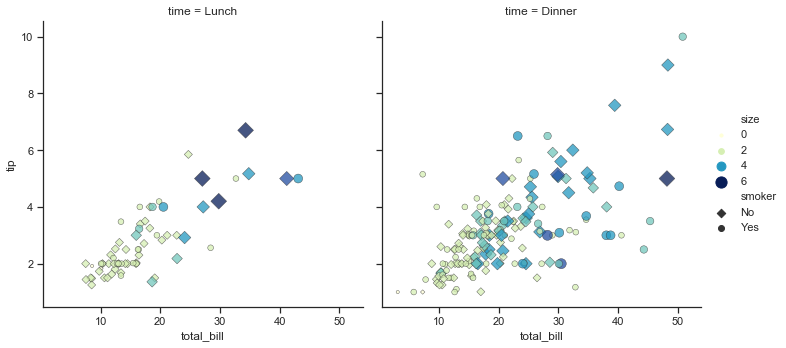

In [64]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="size", style="smoker", size="size",
            palette="YlGnBu", markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75,
            data=tips);

If you're really craving something wildly different than what Seaborn offers you can also dig into the weeds and leverage matplotlib's underlying functionality (we won't explain what every function here is doing, but know that google is your friend if you ever need to resort to matplotlib)! 

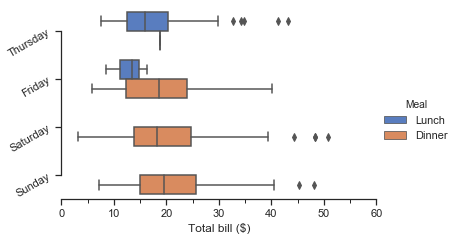

In [65]:
g = sns.catplot(x="total_bill", y="day", hue="time",
                height=3.5, aspect=1.5,
                kind="box", legend=False, data=tips);
g.add_legend(title="Meal")
g.set_axis_labels("Total bill ($)", "")
g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
g.despine(trim=True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
plt.setp(g.ax.get_yticklabels(), rotation=30);

Because seaborn is a wrapper for matplotlib you can leverage alot of matplotlib's underlying functionality too! One of the cool things you can do is set your graphs to some default settings matplotlib has in their style sub package.

In [66]:
#First let's import it
import matplotlib.style as style

#Now we can see the list of default styles they have
style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

If you're a fan of data journalism you've probably heard of (and/or are obsessed with) fivethirtyeight. Let's take a peak at what a graph would look like with their iconic aesthetic.

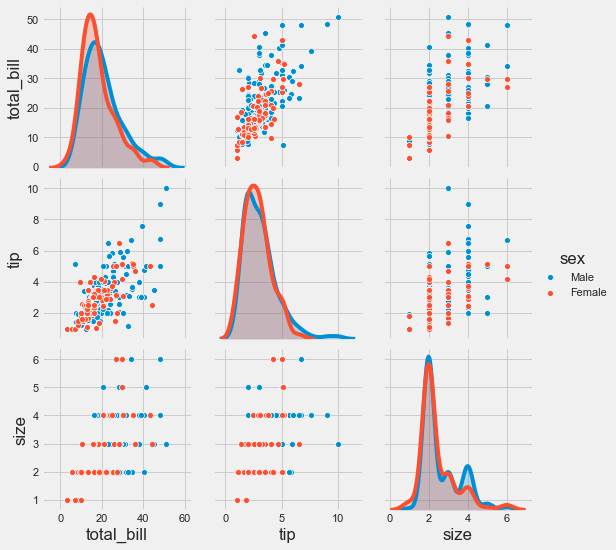

In [67]:
# To set the style we use style.use (this is incidentally what sns.set() is doing!)
style.use('fivethirtyeight')
pp = sns.pairplot(tips, hue="sex")

Nifty right! Play around with some other styles to settle on a favorite you can whip out to dazzle your boss with at your internship. For now let's set our style back to seaborn (or not if you prefer something else!)

In [68]:
sns.set()

### <font color='#eb3483'> Quick knowledge check! </font>
1. Take one of the graphs we've made earlier in this notebook and flex your creative muscle. Try to change at least three visual parameters manually in the function (check the help docs for the function you're using to see what you can change). You should also try out a different style from matplotlib. Sky's the limit, make something beautiful!  
share it on slack